In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import dirname as up

In [2]:
pwd = os.getcwd()
_wd = up(os.getcwd())

os.chdir(_wd+'/Q_0.33_0.5keV/results/')
f_1       = [] #Store focal spots
angles_1  = [] #Store angles
maxvals_1 = [] #Store maximum value at each angle
sum_1     = [] #Store sum of focal spot array at each angle
for i in np.arange(0,51):
    angle = 0.1*i
    temp_ = np.load('foc_spot_Q_0.33_'+str(round(angle,2))+'_degree.npy',)
    angles_1.append(angle)
    f_1.append(temp_)
    maxvals_1.append(np.max(np.abs(temp_)))
    sum_1.append(np.sum(np.abs(temp_)**2))
    
os.chdir(_wd+'/Q_3.33_0.5keV/results/')
f_2       = [] #Store focal spots
angles_2  = [] #Store angles
maxvals_2 = [] #Store maximum value at each angle
sum_2     = [] #Store sum of focal spot array at each angle
for i in np.arange(0,51):
    angle = 0.1*i
    temp_ = np.load('foc_spot_Q_3.33_'+str(round(angle,2))+'_degree.npy',)
    angles_2.append(angle)
    f_2.append(temp_)
    maxvals_2.append(np.max(np.abs(temp_)))
    sum_2.append(np.sum(np.abs(temp_)**2))

os.chdir(_wd+'/Q_10_0.5keV/results')
f_3       = [] #Store focal spots
angles_3  = [] #Store angles
maxvals_3 = [] #Store maximum value at each angle
sum_3     = [] #Store sum of focal spot array at each angle
for i in np.arange(0,51):
    angle = 0.1*i
    temp_ = np.load('foc_spot_Q_10_'+str(round(angle,2))+'_degree.npy',)
    angles_3.append(angle)
    f_3.append(temp_)
    maxvals_3.append(np.max(np.abs(temp_)))
    sum_3.append(np.sum(np.abs(temp_)**2))

    
os.chdir(pwd)

In [3]:
#input intensity
r =  21.09275199243903e-6
step_xy =  4.735423900462963e-9
n_pix = np.pi*r*r/(step_xy**2)
print(n_pix)

62330217.404039085


In [4]:
#Bragg angle associated with outermost zone
r_N = 29.45164238261139e-6
f = 0.5e-3
theta_bragg = (r_N/(2*f))*(180/np.pi)

In [5]:
theta_bragg

1.6874548082522525

In [6]:
#Young limit
#Angle where optical path diff = lambda/4
theta_young = 2.8067

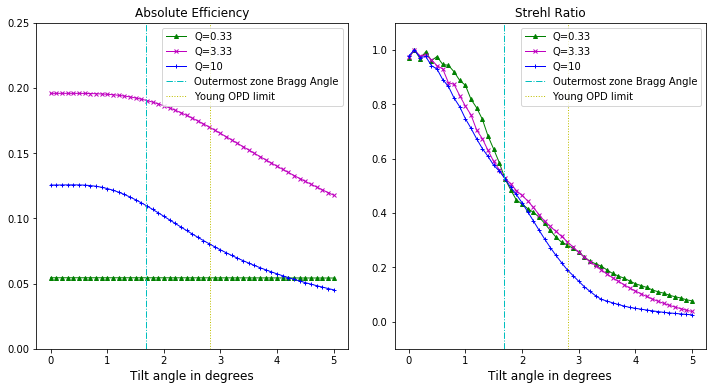

In [7]:
data_1 = np.abs(np.array(sum_1))
data_1 = data_1/n_pix
data_2 = np.abs(np.array(sum_2))
data_2 = data_2/n_pix
data_3 = np.abs(np.array(sum_3))
data_3 = data_3/n_pix


#_norm_ = 320000
_data_1 = np.abs(np.array(maxvals_1))**2
_data_1 = _data_1/np.max(_data_1)
_data_2 = np.abs(np.array(maxvals_2))**2
_data_2 = _data_2/np.max(_data_2)
_data_3 = np.abs(np.array(maxvals_3))**2
_data_3 = _data_3/np.max(_data_3)


plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 1
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(angles_1,data_1,'g^-',label="Q=0.33")
ax1.plot(angles_2,data_2,'mx-',label="Q=3.33")
ax1.plot(angles_3,data_3,'b+-',label="Q=10")
ax1.set_title("Absolute Efficiency",size=12)
ax1.set_ylabel("",size=12)
ax1.set_xlabel("Tilt angle in degrees",size=12)
ax1.set_ylim((0.0,0.25))
ax1.axvline(x=theta_bragg,color='c',linestyle='-.',label="Outermost zone Bragg Angle")
ax1.axvline(x=theta_young,color='y',linestyle=':',label="Young OPD limit")
ax1.legend()
ax2.plot(angles_1,_data_1,'g^-',label="Q=0.33")
ax2.plot(angles_2,_data_2,'mx-',label="Q=3.33")
ax2.plot(angles_3,_data_3,'b+-',label="Q=10")
ax2.set_title("Strehl Ratio",size=12)
ax2.set_xlabel("Tilt angle in degrees",size=12)
ax2.set_ylim((-0.1,1.1))
ax2.axvline(x=theta_bragg,color='c',linestyle='-.',label="Outermost zone Bragg Angle")
ax2.axvline(x=theta_young,color='y',linestyle=':',label="Young OPD limit")
ax2.legend()
fig.subplots_adjust(wspace=0.15)
plt.savefig("tilt_plot_half.svg",format='svg',dpi=250)
plt.show()

In [ ]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["figure.figsize"] = (15,9)
fig,ax = plt.subplots(3,5)

N = 250
n = 100

max_plot_value = 650

ax[0,0].imshow(np.abs(f_1[0])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[0,0].axis('off')
ax[0,1].imshow(np.abs(f_1[5])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[0,1].axis('off')
ax[0,2].imshow(np.abs(f_1[10])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[0,2].axis('off')
ax[0,3].imshow(np.abs(f_1[20])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[0,3].axis('off')
ax[0,4].imshow(np.abs(f_1[40])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[0,4].axis('off')
ax[1,0].imshow(np.abs(f_2[0])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[1,0].axis('off')
ax[1,1].imshow(np.abs(f_2[5])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[1,1].axis('off')
ax[1,2].imshow(np.abs(f_2[10])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[1,2].axis('off')
ax[1,3].imshow(np.abs(f_2[20])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[1,3].axis('off')
ax[1,4].imshow(np.abs(f_2[40])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[1,4].axis('off')
ax[2,0].imshow(np.abs(f_3[0])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[2,0].axis('off')
ax[2,1].imshow(np.abs(f_3[5])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[2,1].axis('off')
ax[2,2].imshow(np.abs(f_3[10])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[2,2].axis('off')
ax[2,3].imshow(np.abs(f_3[20])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[2,3].axis('off')
ax[2,4].imshow(np.abs(f_3[40])[N-n:N+n,N-n:N+n],cmap='coolwarm',vmin = 0,vmax = max_plot_value)
ax[2,4].axis('off')


ax[0,0].set_title(round(angles_1[0],2))
ax[0,1].set_title(round(angles_1[5],2))
ax[0,2].set_title(round(angles_1[10],2))
ax[0,3].set_title(round(angles_1[20],2))
ax[0,4].set_title(round(angles_1[40],2))

fig.subplots_adjust(wspace=0.05)
fig.subplots_adjust(hspace=0.05)

plt.savefig("foc_spot_half.svg",format='svg',dpi=250)

plt.show()